# Task 3

# Imports

In [1]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [2]:
## Depending on the permissions that you provided to your bucket you might need to provide your aws credentials
## to read from the bucket, if so provide with your credentials and pass as storage_options=aws_credentials
# aws_credentials = {"key": "","secret": "","token":""}
df = pd.read_csv("s3://mds-s3-group02/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [3]:
## Use your ML skills to get from step 1 to step 6

In [4]:
#step 2
df = df.dropna()

In [5]:
#step 3
train, test = train_test_split(df, test_size=0.2, random_state=123)
X_train = train.drop(columns=["Observed"])
y_train = train["Observed"]
X_test = test.drop(columns=["Observed"])
y_test = test["Observed"]

In [6]:
#step 4
train.describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
ACCESS-CM2,36791.0,2.4294,6.7914,0.0,0.0541,0.1930,1.4455,149.9676
ACCESS-ESM1-5,36791.0,2.9390,7.0488,0.0,0.0212,0.4928,2.3985,157.6057
AWI-ESM-1-1-LR,36791.0,3.7163,7.2809,0.0,0.0296,0.5923,3.6017,89.4657
BCC-CSM2-MR,36791.0,2.2031,6.5182,0.0,0.0005,0.0964,1.3189,134.4652
BCC-ESM1,36791.0,2.7484,5.9974,0.0,0.0024,0.2987,2.4779,87.1347
CMCC-CM2-HR4,36791.0,3.0928,6.4593,0.0,0.1383,0.6335,3.1826,124.9524
CMCC-CM2-SR5,36791.0,3.5752,7.3535,-0.0,0.0890,0.8279,3.7277,140.1478
CMCC-ESM2,36791.0,3.4898,7.0392,-0.0,0.0927,0.8486,3.6300,137.5916
CanESM5,36791.0,2.8793,6.8989,0.0,0.0225,0.3376,2.5589,135.5698
EC-Earth3-Veg-LR,36791.0,2.5654,5.7327,-0.0,0.0120,0.4297,2.2959,96.4238


<AxesSubplot:>

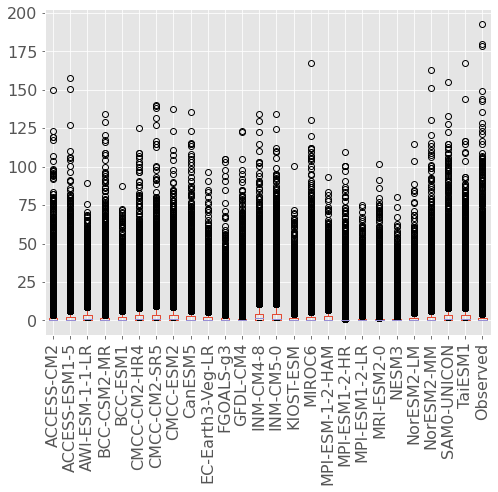

In [7]:
train.boxplot(rot=90)

In [8]:
#step 5
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [9]:
y_pred = rf.predict(X_test)
result_ensemble = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
print(f'RMSE for ensemble model is {result_ensemble:.2f}')

RMSE for ensemble model is 8.86


In [10]:
all_model = {}

for col in X_train.columns:
    rmse = mean_squared_error(y_true = y_test, y_pred = test[col], squared = False)
    all_model[col] = rmse

result_df = pd.DataFrame(all_model.values(), index=all_model.keys(), columns=["RMSE"])
result_df.sort_values("RMSE")

,RMSE
KIOST-ESM,9.600480
FGOALS-g3,9.687788
MRI-ESM2-0,9.922795
MPI-ESM1-2-HR,9.969823
NESM3,9.978137
MPI-ESM1-2-LR,10.260886
NorESM2-LM,10.410145
EC-Earth3-Veg-LR,10.453606
GFDL-CM4,10.511682
BCC-ESM1,10.615578


Yes, we get better result with ensemble model compared to the individual climate models. The RMSE for the ensemble model is 8.86 which is the lowest among all models.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete task 4 from the milestone3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [11]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, bootstrap=False)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=5)

In [12]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.91
 Test RMSE: 8.72


In [13]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).***

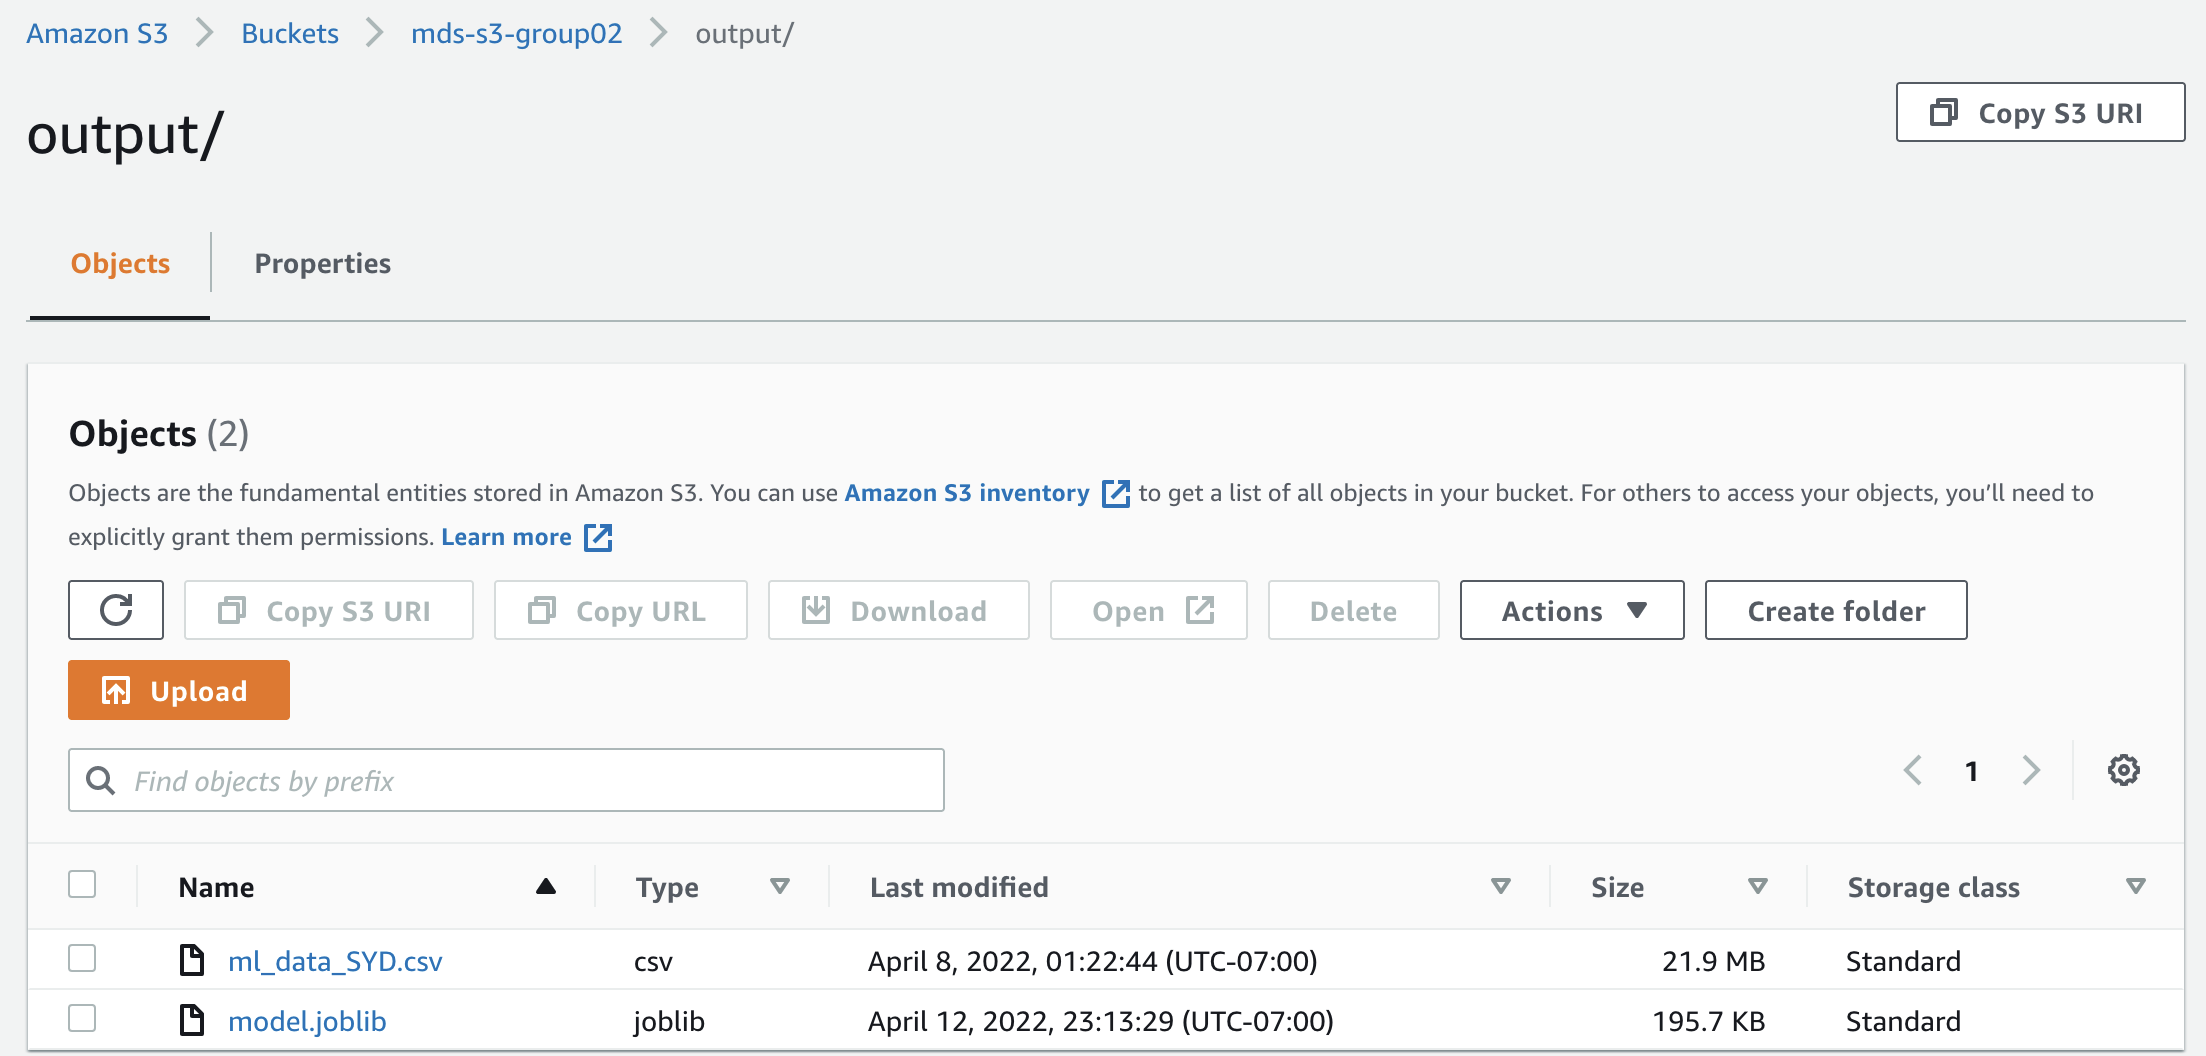